In [2]:
import requests
import json

# JSON 파일 URL
url = "https://open.api.nexon.com/static/fconline/meta/spposition.json"

try:
    # GET 요청으로 JSON 데이터 가져오기
    response = requests.get(url)

    # 응답 상태 확인
    response.raise_for_status()  # 요청 실패 시 예외 발생
    position_data = response.json()  # JSON 데이터를 파싱

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from URL")

In [61]:
# 선수 관련 입력 받기
name = input('이름')
position = input('포지션')
season_id = input('시즌')
match = input('매치종류')

In [3]:
import requests
import json

# JSON 파일 URL
url = "https://open.api.nexon.com/static/fconline/meta/spid.json"

try:
    # GET 요청으로 JSON 데이터 가져오기
    response = requests.get(url)

    # 응답 상태 확인
    response.raise_for_status()  # 요청 실패 시 예외 발생
    spid_data = response.json()  # JSON 데이터를 파싱

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from URL")

In [5]:
for i in range(0,len(spid_data)):
    if spid_data[i]['id']==100167680:
        print(spid_data[i]['name'])

로날트 쿠만


In [ ]:
# 선수 아이디 추출
for i in range(0, len(spid_data)):
    if name == spid_data[i]['name'] and season_id == str(spid_data[i]['id'])[:3]:
        id = spid_data[i]['id']
    else:
        print('❎ 입력하신 정보에 일치하는 선수를 찾을 수 없습니다.')

player_array = [{"id": str(id), "po": position}]
# JSON 배열을 문자열로 변환
player_string = json.dumps(player_array)

In [ ]:
from dotenv import load_dotenv
import os
from urllib.parse import quote

# .env 파일 로드
load_dotenv()

# API 키 가져오기
api_key = os.getenv("API_KEY")

ranker_url = "https://open.api.nexon.com/fconline/v1/ranker-stats"

# 요청 헤더
headers = {
    'x-nxopen-api-key': api_key
}

# 쿼리 파라미터
params = {
    'matchtype': match,
    'players': player_string
}

response = requests.get(ranker_url, headers=headers, params=params)

✅ 해당 선수의 평균 경기 스탯


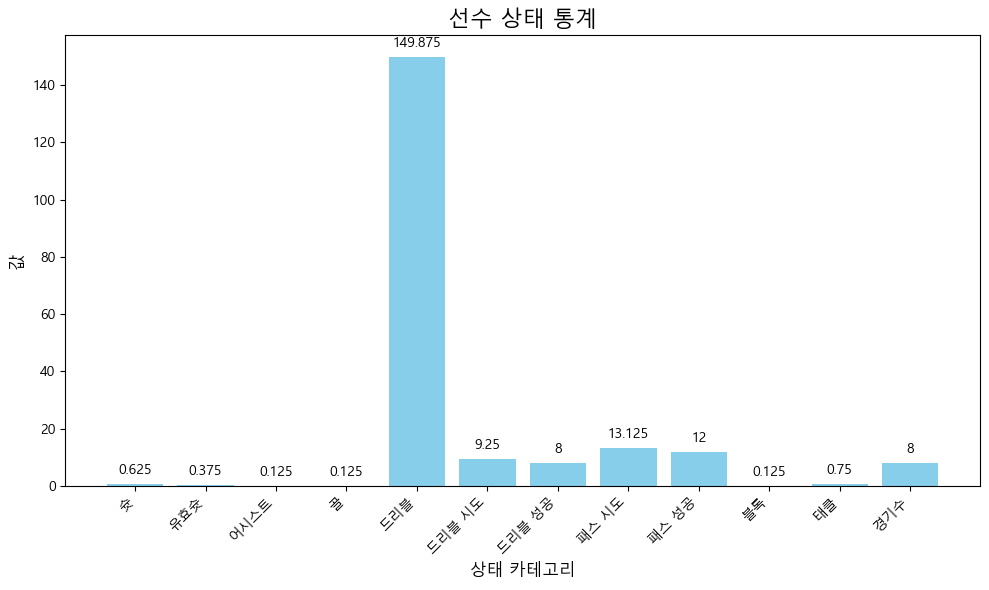

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 결과 확인
if response.status_code == 200:
    search_data = response.json()
    print(f"✅ 해당 선수의 평균 경기 스탯")

    # 첫 번째 항목의 'status' 값 가져오기
    status_data = search_data[0]["status"]

    # 키와 값 분리
    keys = ['슛', '유효슛', '어시스트', '골', '드리블', '드리블 시도', '드리블 성공', '패스 시도', '패스 성공', '블록', '태클', '경기수']
    values = list(status_data.values())

    # 한글 폰트 설정 (Windows에서 Malgun Gothic 사용)
    rc('font', family='Malgun Gothic')

    # 막대 그래프 그리기
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(keys, values, color='skyblue')

    # 각 막대 위에 값 표시
    ax.bar_label(bars, padding=5)

    # 그래프 꾸미기
    plt.title("선수 상태 통계", fontsize=16)
    plt.xlabel("상태 카테고리", fontsize=12)
    plt.ylabel("값", fontsize=12)
    plt.xticks(rotation=45, ha='right')  # X축 라벨 회전
    plt.tight_layout()

    # 그래프 출력
    plt.show()

else:
    print(f"❎ 입력하신 정보와 일치하는 기록이 없습니다.")

{'action': 'search_stat', 'action_input': '게임 내 로날트 쿠만의 경기 평균 스탯 알려줘', 'search_keyword': '로날트 쿠만'}
✅ 해당 선수의 평균 경기 스탯


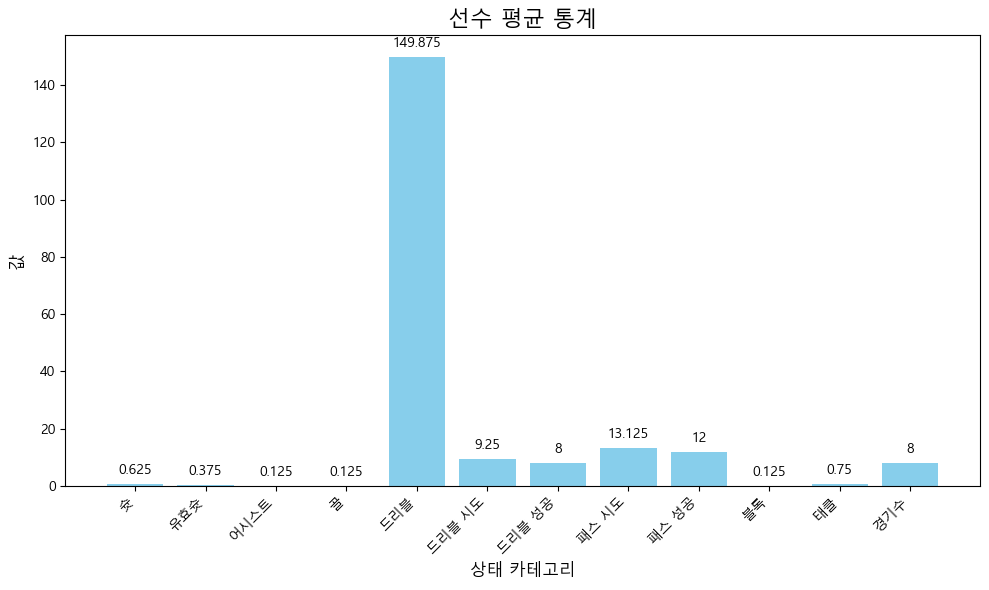

None


In [15]:
# LangChain 관련: LLM과 프롬프트 처리를 위한 라이브러리
from langchain_core.prompts import PromptTemplate  # 프롬프트 템플릿을 생성하고 관리하기 위한 클래스
from langchain_openai import ChatOpenAI  # OpenAI의 GPT 모델을 사용하기 위한 인터페이스
from langchain_core.tools import Tool  # 외부 도구나 API를 통합하기 위한 기본 클래스
from langchain_core.runnables import RunnableSequence  # 여러 컴포넌트를 순차적으로 실행하기 위한 클래스
# LLM의 출력을 JSON 형식으로 파싱하는 도구
from langchain_core.output_parsers import JsonOutputParser
import requests
import json

# 파이썬 타입 힌팅을 위한 임포트
# 타입 힌팅은 코드의 가독성을 높이고 IDE의 자동완성 기능을 개선합니다
from typing import List, Union, Any, Dict, Literal  # 다양한 타입 힌팅 클래스들

# 유틸리티 라이브러리들
from datetime import datetime  # 날짜와 시간 처리를 위한 클래스
from dataclasses import dataclass  # 데이터 클래스 생성을 위한 데코레이터
from pydantic import BaseModel, Field  # 데이터 검증과 직렬화를 위한 Pydantic 라이브러리
import requests  # HTTP 요청 처리를 위한 라이브러리
import re  # 정규 표현식 처리를 위한 라이브러리
import os  # 운영체제 관련 기능과 환경 변수 접근을 위한 라이브러리
from dotenv import load_dotenv  # .env 파일에서 환경 변수를 로드하기 위한 라이브러리
import matplotlib.pyplot as plt
from matplotlib import rc
from urllib.parse import quote


@dataclass
class AssistantConfig:
    """
    Assistant의 설정을 관리하는 데이터 클래스
    데이터클래스는 설정값을 깔끔하게 관리하고 타입 검사를 제공합니다.
    
    Attributes:
        youtube_api_key (str): YouTube Data API 접근을 위한 인증 키
        llm_model (str): 사용할 언어 모델의 이름 (예: gpt-4)
        temperature (float): 언어 모델의 창의성 조절 파라미터 (0.0 = 결정적, 1.0 = 창의적)
        not_supported_message (str): FC Online 게임 관련이 아닌 질문에 대한 기본 응답 메시지
    """
    youtube_api_key: str
    nexon_api_key: str
    openai_api_key : str
    llm_model: str
    temperature: float = 0.0
    not_supported_message: str = "죄송합니다. FC Online 게임 관련 영상만 제공할 수 있습니다."


class AgentAction(BaseModel):
    """
    에이전트의 행동을 정의하는 Pydantic 모델
    Pydantic은 데이터 검증 및 관리를 위한 라이브러리입니다.
    """
    # Literal을 사용하여 action 필드가 가질 수 있는 값을 제한합니다
    action: Literal["search_stat", "search_video", "not_supported"] = Field(
        description="에이전트가 수행할 행동의 타입을 지정합니다",
    )

    action_input: str = Field(
        description="사용자가 입력한 원본 질의 텍스트입니다",
        min_length=1,  # 최소 1글자 이상이어야 함
    )

    search_keyword: str = Field(
        description="""검색에 사용할 최적화된 키워드입니다.
        특정 선수 평균 통계 관련 키워드일 경우 선수 이름을 포함하고,
        이외의 경우 핵심 검색어를 포함,
        not_supported 액션의 경우 빈 문자열('')을 사용합니다""",
        examples=["FC Online 공략", "FC Online 손흥민 리뷰"]  # 예시 제공
    )


class Assistant:
    """
    검색 결과를 제공하는 통합 어시스턴트
    이 클래스는 사용자 질의를 처리하고 관련 정보를 검색하는 핵심 기능을 제공합니다.
    """

    @classmethod
    def from_env(cls) -> "Assistant":
        """
        환경 변수에서 설정을 로드하여 인스턴스를 생성하는 클래스 메서드
        이 방식을 사용하면 설정을 코드와 분리하여 관리할 수 있습니다.
        """
        # .env 파일 로드
        load_dotenv()
        config = AssistantConfig(
            youtube_api_key=os.getenv(
                "YOUTUBE_API_KEY"),  # 환경 변수에서 API 키 로드
            nexon_api_key=os.getenv("API_KEY"),
            openai_api_key = os.getenv("OPENAI_API_KEY"),
            llm_model=os.getenv("OPENAI_MODEL", "gpt-4o-mini"),  # 기본 모델 지정
            temperature=float(os.getenv("TEMPERATURE", "0.0")
                                ),  # 문자열을 float로 변환
        )
        return cls(config)

    def __init__(self, config: AssistantConfig):
        """
        Assistant 초기화
        모든 필요한 컴포넌트와 설정을 초기화합니다.
        """
        self.config = config
        # YouTube API 엔드포인트 URL 설정
        self.search_url = "https://www.googleapis.com/youtube/v3/search"
        self.video_url = "https://www.googleapis.com/youtube/v3/videos"
        self.position_url = "https://open.api.nexon.com/static/fconline/meta/spposition.json"
        self.spid_url = "https://open.api.nexon.com/static/fconline/meta/spid.json"
        self.ranker_url = "https://open.api.nexon.com/fconline/v1/ranker-stats"
        

        # LangChain의 ChatOpenAI 모델 초기화
        self.llm = ChatOpenAI(
            temperature=config.temperature, model=config.llm_model, openai_api_key=config.openai_api_key)

        # JSON 출력 파서 설정
        self.output_parser = JsonOutputParser(pydantic_object=AgentAction)

        # 프롬프트 템플릿 설정
        # 이 템플릿은 AI가 질의를 어떻게 처리할지 지시합니다
        self.prompt = PromptTemplate(
            input_variables=["input"],  # 템플릿에서 사용할 변수들
            partial_variables={
                "format_instructions": self.output_parser.get_format_instructions()},
            template="""## FC Online 관련 정보 검색 프롬프트 규칙

### 1. FC Online 게임 관련 질의인지 확인
**FC Online과 관련된 키워드 예시:**
- 축구 선수 이름: 손흥민, 메시, 호날두 등
- 게임 관련 키워드: FC Online, Nexon, 선수 강화, 포지션 추천, 전술 공략 등
- 일반적인 구문: "FC Online에서", "게임 내", "선수 통계" 등

**판단 기준:**
- 키워드에 Nexon의 FC Online 게임 또는 관련 콘텐츠가 포함되어 있어야 함
- 사용자의 질문이 FC Online 게임 외 다른 분야(예: 실제 축구 경기 분석)일 경우:
  - `action`: `"not_supported"`
  - `search_keyword`: `""`

---

### 2. 특정 선수 경기 종합 통계와 관련된지 확인
**동작 우선순위:**  
1. 질문에 **선수 이름**이 포함되고, 통계 키워드가 존재하면 반드시 `"search_stat"`로 판단.  
2. 통계 키워드가 없는 경우에만 동영상 관련 키워드("search_video")를 분석.  

**동작:**  
  - `action`: `"search_stat"`  
  - `search_keyword`: 선수 이름

---

### 3. 유튜브 검색 여부 판단
**판단 기준:**
- 질문에 **선수 이름**이 포함되거나 **영상 관련 키워드**가 등장하면 동영상 검색으로 판단
- 동영상 검색 키워드:
  - "공략"
  - "활용법"
  - "추천 영상"
  - "전술 강좌"

**동작:**  
  - `action`: `"search_video"`  
  - `search_keyword`: 최적화된 검색 키워드 작성

---

### 4. 우선순위 설정
1. 특정 선수 통계 관련 질의가 있는 경우 `"search_stat"`로 우선 판단.
2. 동영상 검색 키워드가 있는 경우 `"search_video"`로 처리.
3. 위 조건에 해당하지 않으면 `"not_supported"`.

---

## 질의 분석 예시

### 질의:
1. "게임 내 로날드 쿠만 경기 평균 스탯 알려줘."
   - **action:** `"search_stat"`
   - **search Keyword:** `"로날드 쿠만"`

2. "FC Online 메시 활용법 영상 추천해줘."
   - **action:** `"search_video"`
   - **search Keyword:** `"FC Online 메시 활용법"`

3. "챔피언스리그 결과 알려줘."
   - **action:** `"not_supported"`
   - **search Keyword:** `""`

4. "최신 전술 추천 영상 있어?"
   - **action:** `"search_video"`
   - **search Keyword:** `"FC Online 최신 전술 추천"`

5. "게임 내 메시 경기 평균 스탯은?"
   - **action:** `"search_stat"`
   - **search_keyword:** `"메시"`

6. "호날두의 강화 후 경기력 분석해줘."
   - **action:** `"search_stat"`
   - **search_keyword:** `"호날두"`



분석할 질의: {input}

{format_instructions}""")

        # 실행 체인 생성
        # 프롬프트 -> LLM -> 출력 파서로 이어지는 처리 파이프라인
        self.chain = RunnableSequence(
            first=self.prompt,
            middle=[self.llm],
            last=self.output_parser
        )

    def search_stat(self, query: str):
        # GET 요청으로 JSON 데이터 가져오기(포지션 데이터)
        response = requests.get(self.position_url)

        # 응답 상태 확인
        response.raise_for_status()  # 요청 실패 시 예외 발생
        position_data = response.json()  # JSON 데이터를 파싱

        # GET 요청으로 JSON 데이터 가져오기(선수 id 데이터)
        response = requests.get(self.spid_url)

        # 응답 상태 확인
        response.raise_for_status()  # 요청 실패 시 예외 발생
        spid_data = response.json()  # JSON 데이터를 파싱

        season_id = input('시즌 아이디를 입력하세요.')
        position = input('포지션을 입력하세요.')
        match = input('매치 번호를 입력하세요.')

        # 선수 아이디 추출
        found_player = False  # 선수 정보 찾았는지 여부를 추적할 변수

        for i in range(0, len(spid_data)):
            if query == spid_data[i]['name'] and season_id == str(spid_data[i]['id'])[:3]:
                id = spid_data[i]['id']
                player_array = [{"id": str(id), "po": position}]
                # JSON 배열을 문자열로 변환
                player_string = json.dumps(player_array)

                # 요청 헤더
                headers = {
                    'x-nxopen-api-key': self.config.nexon_api_key
                }

                # 쿼리 파라미터
                params = {
                    'matchtype': match,
                    'players': player_string
                }

                response = requests.get(self.ranker_url, headers=headers, params=params)

                # 결과 확인
                if response.status_code == 200:
                    search_data = response.json()
                    print(f"✅ 해당 선수의 평균 경기 스탯")

                    # 첫 번째 항목의 'status' 값 가져오기
                    status_data = search_data[0]["status"]

                    # 키와 값 분리
                    keys = ['슛', '유효슛', '어시스트', '골', '드리블', '드리블 시도', '드리블 성공', '패스 시도', '패스 성공', '블록', '태클', '경기수']
                    values = list(status_data.values())

                    # 한글 폰트 설정 (Windows에서 Malgun Gothic 사용)
                    rc('font', family='Malgun Gothic')

                    # 막대 그래프 그리기
                    fig, ax = plt.subplots(figsize=(10, 6))
                    bars = ax.bar(keys, values, color='skyblue')

                    # 각 막대 위에 값 표시
                    ax.bar_label(bars, padding=5)

                    # 그래프 꾸미기
                    plt.title("선수 평균 통계", fontsize=16)
                    plt.xlabel("상태 카테고리", fontsize=12)
                    plt.ylabel("값", fontsize=12)
                    plt.xticks(rotation=45, ha='right')  # X축 라벨 회전
                    plt.tight_layout()

                    # 그래프 출력
                    plt.show()
                else:
                    print(f"❎ 입력하신 정보의 기록이 없습니다.")
                
                found_player = True  # 선수를 찾았다고 표시
                break  # 선수 정보가 찾았으므로 반복문 종료

        if not found_player:
            print('❎ 입력하신 정보에 일치하는 선수를 찾을 수 없습니다.')

        

    def search_videos(self, query: str, max_results: int = 5) -> str:
        """
        YouTube API를 사용하여 비디오를 검색하고 정보를 수집하는 메서드
        
        Args:
            query: 검색할 키워드
            max_results: 검색할 최대 비디오 수 (기본값: 5)
            
        Returns:
            str: 포맷팅된 검색 결과 또는 에러 메시지
        """
        try:
            # YouTube API 검색 파라미터 설정
            search_params = {
                'key': self.config.youtube_api_key,
                'q': query,
                'part': 'snippet',
                'maxResults': max_results,
                'type': 'video',
                'order': 'relevance',
                'regionCode': 'KR',  # 한국 지역 설정
                'relevanceLanguage': 'ko'  # 한국어 선호
            }

            # 검색 API 호출
            response = requests.get(self.search_url, params=search_params)
            response.raise_for_status()  # HTTP 에러 체크

            search_data = response.json()
            if 'items' not in search_data or not search_data['items']:
                return "검색 결과가 없습니다."

            video_list = []

            # 각 비디오의 상세 정보 수집
            for item in search_data['items']:
                try:
                    video_id = item['id']['videoId']
                    video_stats = self._get_video_stats(
                        video_id)  # 비디오 통계 정보 조회

                    # ISO 8601 형식의 날짜를 한국어 형식으로 변환
                    published_at = datetime.strptime(
                        item['snippet']['publishedAt'],
                        "%Y-%m-%dT%H:%M:%SZ"
                    )
                    formatted_date = published_at.strftime("%Y년 %m월 %d일")

                    # 비디오 정보 딕셔너리 생성
                    video = {
                        'title': item['snippet']['title'],
                        'channel': item['snippet']['channelTitle'],
                        'published_at': formatted_date,
                        'description': item['snippet']['description'],
                        'url': f'https://www.youtube.com/watch?v={video_id}',
                        'view_count': int(video_stats.get('viewCount', 0)),
                        'like_count': int(video_stats.get('likeCount', 0))
                    }
                    video_list.append(video)
                except Exception as e:
                    print(f"비디오 정보 처리 중 오류 발생: {e}")
                    continue

            if not video_list:
                return "검색된 영상의 상세 정보를 가져오는데 실패했습니다."

            return self._format_results(query, video_list)

        except Exception as e:
            return f"검색 중 오류 발생: {e}"

    def _get_video_stats(self, video_id: str) -> dict:
        """
        특정 비디오의 통계 정보를 조회하는 내부 메서드
        
        Args:
            video_id: YouTube 비디오 ID
            
        Returns:
            dict: 비디오 통계 정보 (조회수, 좋아요 수 등)
        """
        try:
            params = {
                'key': self.config.youtube_api_key,
                'id': video_id,
                'part': 'statistics'
            }

            response = requests.get(self.video_url, params=params)
            response.raise_for_status()

            data = response.json()
            if data.get('items'):
                return data['items'][0]['statistics']
            return {}

        except Exception as e:
            print(f"비디오 통계 정보 조회 중 오류 발생: {e}")
            return {}

    def _format_results(self, query: str, videos: list) -> str:
        """
        검색 결과를 보기 좋게 포맷팅하는 내부 메서드
        
        Args:
            query: 원본 검색어
            videos: 비디오 정보 리스트
            
        Returns:
            str: 포맷팅된 검색 결과 문자열
        """
        result = f"'{query}'에 대한 검색 결과:\n"
        result += f"총 {len(videos)}개의 영상이 검색됨\n\n"

        for i, video in enumerate(videos, 1):
            result += f"{i}. {video['title']}\n"
            result += f"   채널: {video['channel']}\n"
            result += f"   날짜: {video['published_at']}\n"
            result += f"   조회수: {video['view_count']:,}회\n"
            result += f"   좋아요: {video['like_count']:,}명\n"
            result += f"   URL: {video['url']}\n"
            result += f"   설명: {video['description'][:150]}...\n\n"

        return result

    def process_query(self, query: str) -> str:
        """
        사용자 질문을 처리하고 적절한 응답을 생성하는 메인 메서드

        Args:
            query: 사용자의 질문 문자열

        Returns:
            str: 검색 결과 또는 에러 메시지
        """
        try:
            result = self.chain.invoke({"input": query})
            print(result)

            # 분석 결과에서 필요한 정보 추출
            action = result["action"]  # 수행할 액션
            action_input = result["action_input"]  # 원본 사용자 입력
            search_keyword = result["search_keyword"]  # LLM이 추출한 최적화된 검색어

            # AI 관련 질의가 아닌 경우 지원하지 않는다는 메시지 반환
            if action == "not_supported":
                return self.config.not_supported_message

            # AI 관련 질의인 경우 분기 처리
            if action == "search_stat":
                return self.search_stat(search_keyword)
            elif action == "search_video":
                return self.search_videos(search_keyword)

        except Exception as e:
            return f"처리 중 오류 발생: {e}"



def main():

    try:
        query = input('질문을 입력하세요.')
        # 환경 변수에서 설정을 로드하여 어시스턴트 인스턴스 생성
        assistant = Assistant.from_env()

        # 테스트 케이스 실행 및 결과 출력
        result = assistant.process_query(query)
        print("="*60)
        print(result)
        print("="*60)

    except Exception as e:
        print(f"오류 발생: {e}")


# 스크립트가 직접 실행될 때만 main() 함수 호출
if __name__ == "__main__":
    main()

In [ ]:
# 이름 : 로날트 쿠만
# 시즌 아이디 : 100
# 매치 종류 : 52
# 포지션 : 18

# 질문 : 게임 내 로날트 쿠만의 경기 평균 스탯 알려줘